In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../data/full.csv')

In [35]:
df.sort_values('yieldpercol')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
241,NJ,10000.0,19,190000.0,101000.0,1.60,304000.0,2003
144,ME,11000.0,20,220000.0,106000.0,0.79,174000.0,2001
101,ME,11000.0,21,231000.0,143000.0,0.75,173000.0,2000
58,ME,14000.0,22,308000.0,89000.0,0.83,256000.0,1999
358,ME,11000.0,23,253000.0,86000.0,1.60,405000.0,2006
...,...,...,...,...,...,...,...,...
187,LA,35000.0,124,4340000.0,347000.0,1.16,5034000.0,2002
28,ND,230000.0,128,29440000.0,8832000.0,0.63,18547000.0,1998
309,HI,9000.0,131,1179000.0,283000.0,1.43,1686000.0,2005
792,HI,12000.0,131,1572000.0,16000.0,1.51,2374000.0,2017


In [38]:
low_states = ['MD', 'NM', 'NV', 'OK', 'SC']
df2 = df[~df.state.isin(low_states)]

In [91]:
df2.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.196917,0.950501,0.803750,-0.224821,0.906235,0.015745
yieldpercol,0.196917,1.000000,0.363208,0.348984,-0.398118,0.228774,-0.308476
totalprod,0.950501,0.363208,1.000000,0.867004,-0.253534,0.898538,-0.060902
stocks,0.803750,0.348984,0.867004,1.000000,-0.287982,0.696741,-0.149462
priceperlb,-0.224821,-0.398118,-0.253534,-0.287982,1.000000,-0.084617,0.709114
prodvalue,0.906235,0.228774,0.898538,0.696741,-0.084617,1.000000,0.171205
year,0.015745,-0.308476,-0.060902,-0.149462,0.709114,0.171205,1.000000


Some basic plots over time

In [70]:
avgs = df2.groupby('year').mean().reset_index()

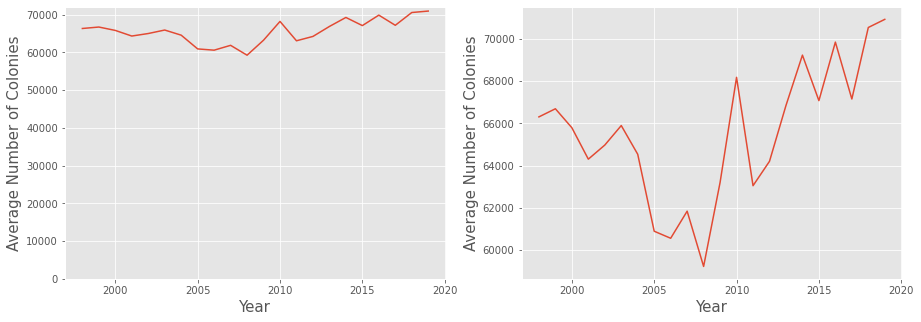

In [72]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(avgs['year'], avgs['numcol'])
axes[0].set_ylim([0, 72000])
axes[1].plot(avgs['year'], avgs['numcol'])
axes[0].set_xlabel('Year', fontsize=15)
axes[1].set_xlabel('Year', fontsize=15)
axes[0].set_ylabel('Average Number of Colonies', fontsize=15)
axes[1].set_ylabel('Average Number of Colonies', fontsize=15);

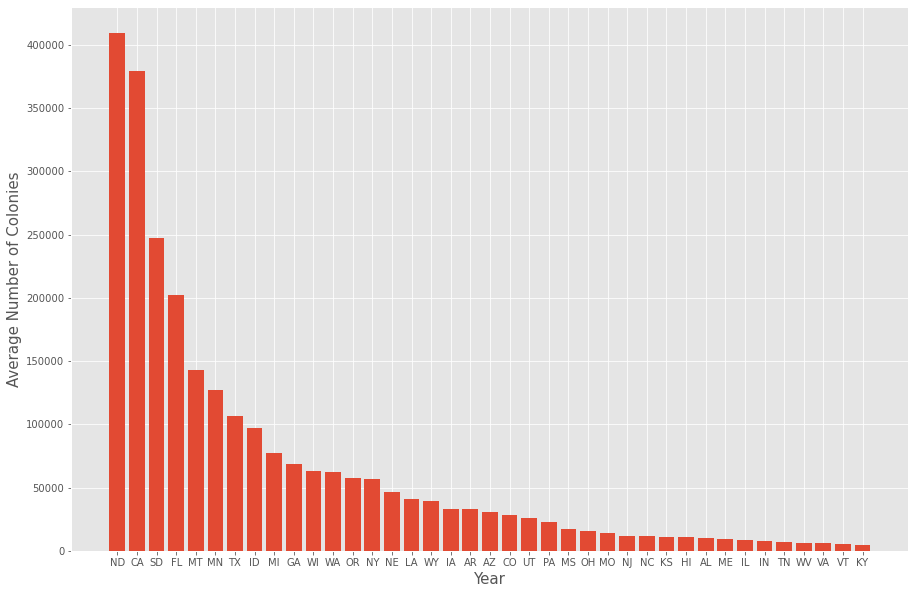

In [76]:
states = df2.groupby('state').mean().reset_index().sort_values('numcol', ascending=False)[['state', 'numcol']]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(states['state'], states['numcol'])
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Average Number of Colonies', fontsize=15);

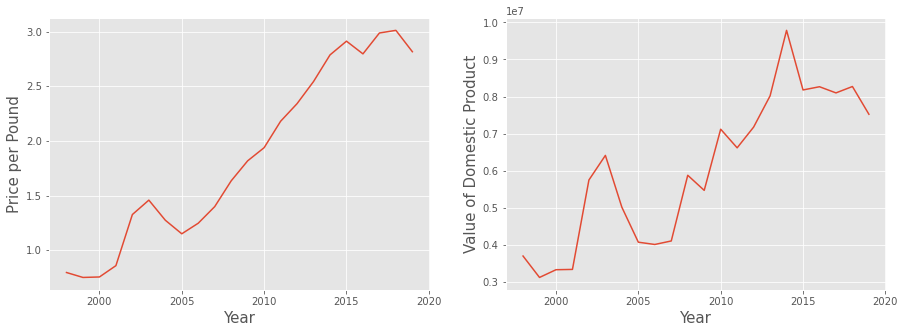

In [77]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(avgs['year'], avgs['priceperlb'])
axes[1].plot(avgs['year'], avgs['prodvalue'])
axes[0].set_xlabel('Year', fontsize=15)
axes[1].set_xlabel('Year', fontsize=15)
axes[0].set_ylabel('Price per Pound', fontsize=15)
axes[1].set_ylabel('Value of Domestic Product', fontsize=15);

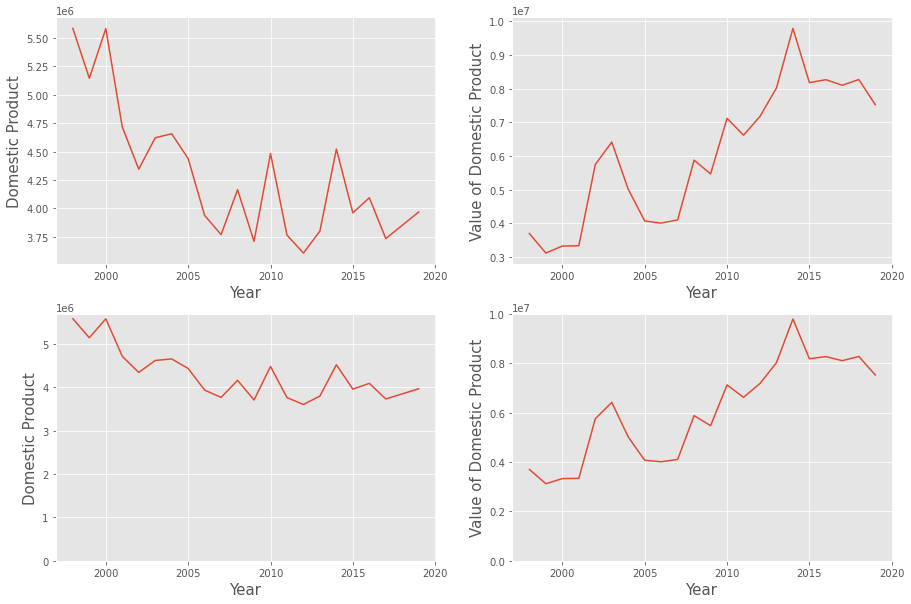

In [78]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot(avgs['year'], avgs['totalprod'])
axes[0][1].plot(avgs['year'], avgs['prodvalue'])
axes[1][0].plot(avgs['year'], avgs['totalprod'])
axes[1][1].plot(avgs['year'], avgs['prodvalue'])
axes[1][0].set_ylim([0,5700000])
axes[1][1].set_ylim([0,10000000])
axes[0][0].set_xlabel('Year', fontsize=15)
axes[0][1].set_xlabel('Year', fontsize=15)
axes[0][0].set_ylabel('Domestic Product', fontsize=15)
axes[0][1].set_ylabel('Value of Domestic Product', fontsize=15)
axes[1][0].set_xlabel('Year', fontsize=15)
axes[1][1].set_xlabel('Year', fontsize=15)
axes[1][0].set_ylabel('Domestic Product', fontsize=15)
axes[1][1].set_ylabel('Value of Domestic Product', fontsize=15);

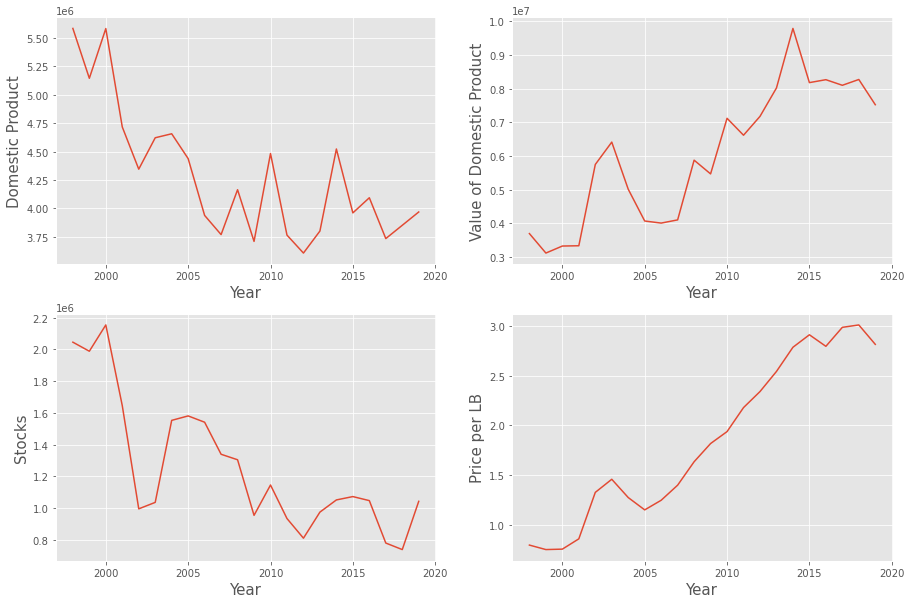

In [80]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot(avgs['year'], avgs['totalprod'])
axes[0][1].plot(avgs['year'], avgs['prodvalue'])
axes[1][0].plot(avgs['year'], avgs['stocks'])
axes[1][1].plot(avgs['year'], avgs['priceperlb'])
axes[0][0].set_xlabel('Year', fontsize=15)
axes[0][1].set_xlabel('Year', fontsize=15)
axes[0][0].set_ylabel('Domestic Product', fontsize=15)
axes[0][1].set_ylabel('Value of Domestic Product', fontsize=15)
axes[1][0].set_xlabel('Year', fontsize=15)
axes[1][1].set_xlabel('Year', fontsize=15)
axes[1][0].set_ylabel('Stocks', fontsize=15)
axes[1][1].set_ylabel('Price per LB', fontsize=15);

In [83]:
df2[df2['state'] == 'CA']

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
46,CA,465000.0,60,27900000.0,9486000.0,0.55,15345000.0,1999
89,CA,440000.0,70,30800000.0,11396000.0,0.59,18172000.0,2000
132,CA,460000.0,61,28060000.0,7857000.0,0.69,19361000.0,2001
176,CA,470000.0,50,23500000.0,3525000.0,1.32,31020000.0,2002
220,CA,480000.0,67,32160000.0,6432000.0,1.39,44702000.0,2003
264,CA,390000.0,45,17550000.0,5792000.0,1.05,18428000.0,2004
305,CA,400000.0,75,30000000.0,9300000.0,0.86,25800000.0,2005
346,CA,380000.0,52,19760000.0,7706000.0,0.97,19167000.0,2006
387,CA,340000.0,40,13600000.0,3672000.0,1.04,14144000.0,2007


In [85]:
state_dic = {}
df2.state.unique

<bound method Series.unique of 0      AL
1      AZ
2      AR
3      CA
4      CO
       ..
900    VA
901    WA
902    WV
903    WI
904    WY
Name: state, Length: 858, dtype: object>